# Lab 5: Visualization for Statistical Inference

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Load the wine quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=";")

# Check the first few rows
wine_data.head()

# Inspect data types and missing values
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Distribution of Wine Quality
- Objective: Visualize the distribution of wine quality classes and assess if the dataset is balanced or imbalanced.
- Exercise: Create a bar plot that shows the count of each wine quality level (from 0 to 10) in the dataset. Highlight any underrepresented classes.

/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_6558/1932278934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


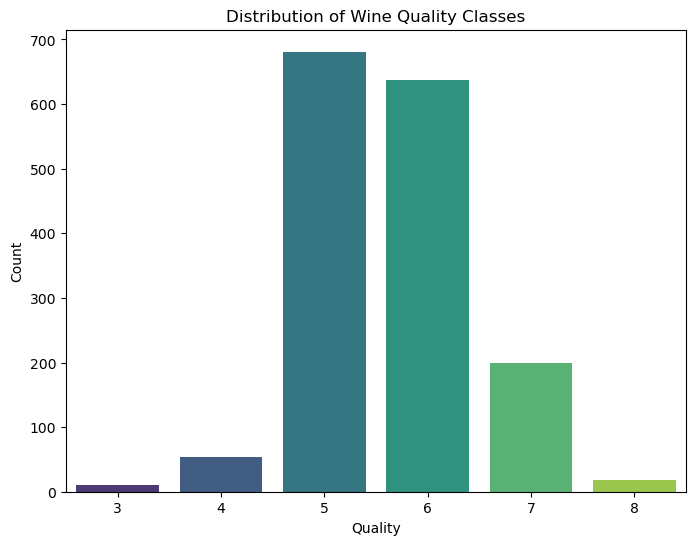

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality Classes')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Boxplot of Alcohol Content by Wine Quality
- Objective: Explore the relationship between alcohol content and wine quality.
- Exercise: Plot a boxplot of alcohol content against wine quality to see if higher quality wines tend to have higher alcohol content.

/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_6558/1349265194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='coolwarm')


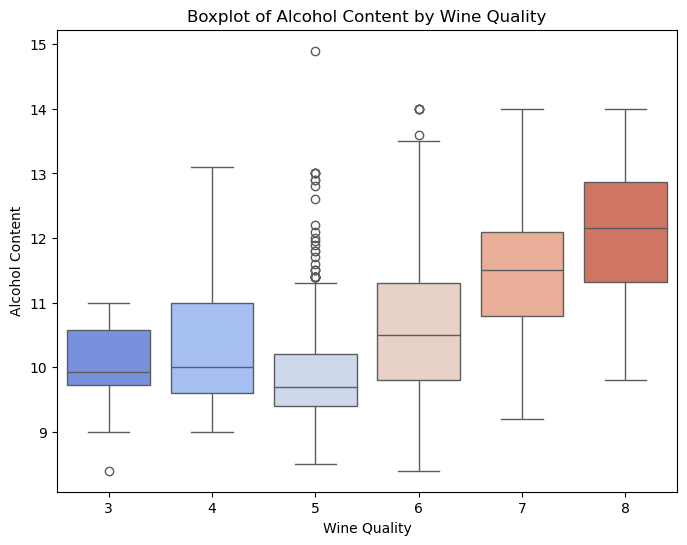

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='coolwarm')
plt.title('Boxplot of Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

## Violin Plot of Acidity by Wine Quality
- Objective: Visualize the distribution of acidity across different wine quality levels.
- Exercise: Create a violin plot for volatile acidity versus wine quality. Check if lower quality wines have higher volatile acidity.

/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_6558/3756237305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='volatile acidity', data=wine_data, palette='Set2')


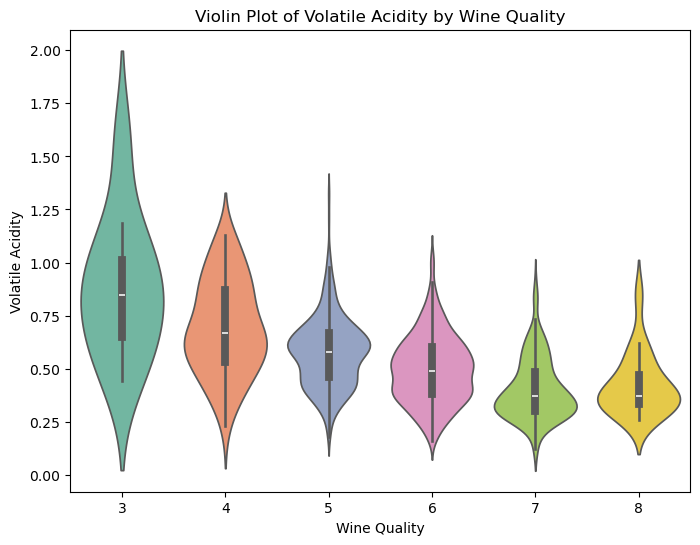

In [5]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='volatile acidity', data=wine_data, palette='Set2')
plt.title('Violin Plot of Volatile Acidity by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.show()

## Pair Plot for Alcohol, Acidity, and Sulfates by Wine Quality
- Objective: Investigate relationships between alcohol, volatile acidity, and sulfates, segmented by wine quality.
- Exercise: Use pairplot to examine these variables and the extent to which they separate different wine quality classes.

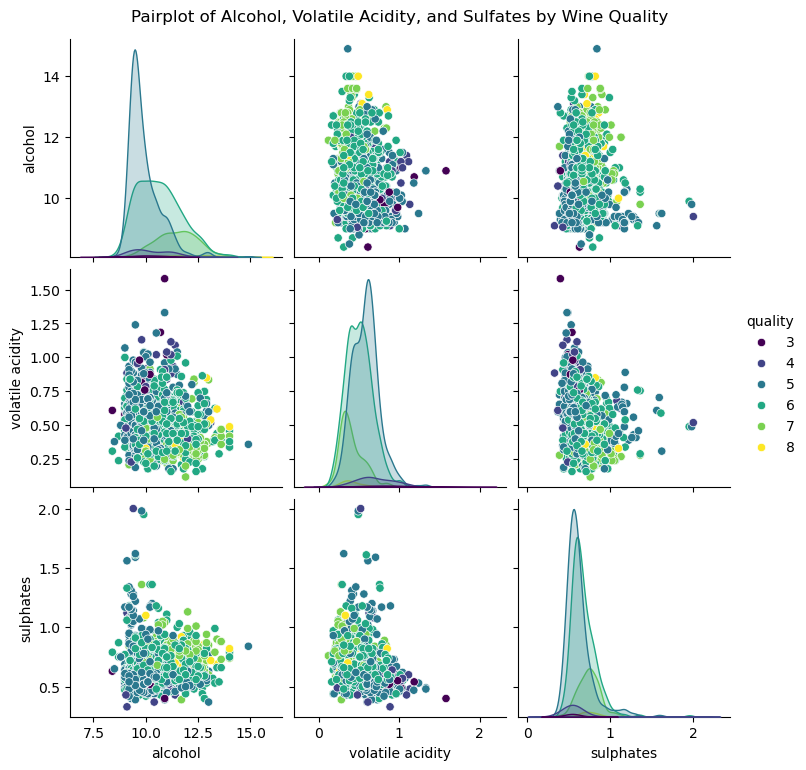

In [ ]:
selected_features = ['alcohol', 'volatile acidity', 'sulphates', 'quality']
sns.pairplot(wine_data[selected_features], hue='quality', palette='viridis')
plt.suptitle('Pairplot of Alcohol, Volatile Acidity, and Sulfates by Wine Quality', y=1.02)
plt.show()

## Scatter Plot with Regression Line: Alcohol vs. Density
- Objective: Examine the correlation between alcohol content and wine density, with a focus on the confidence intervals.
- Exercise: Create a scatter plot of alcohol vs. density with a regression line and 95% confidence interval, and segment it by wine quality.

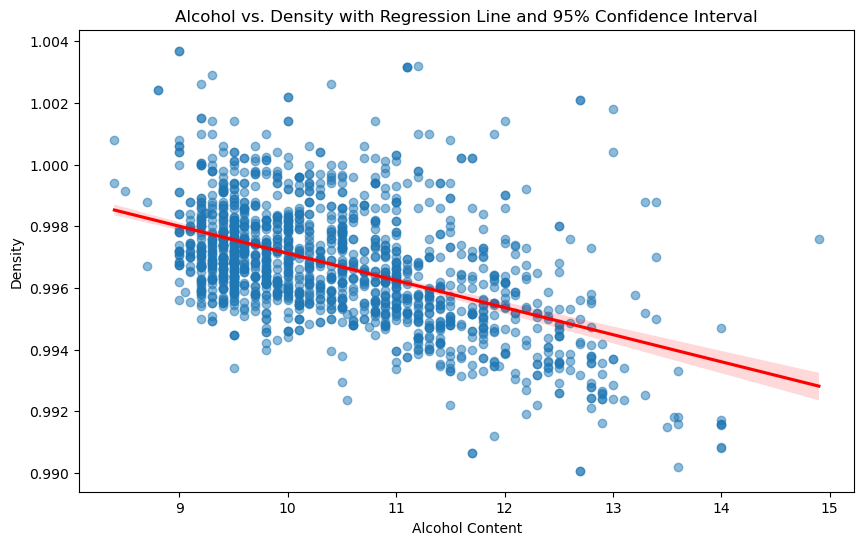

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='density', data=wine_data, ci=95, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Alcohol vs. Density with Regression Line and 95% Confidence Interval')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()

## Heatmap of Correlations Between Wine Features
- Objective: Understand the relationships between different features and their correlation with wine quality.
- Exercise: Create a heatmap to display the correlation between all features, highlighting which variables most strongly correlate with quality.

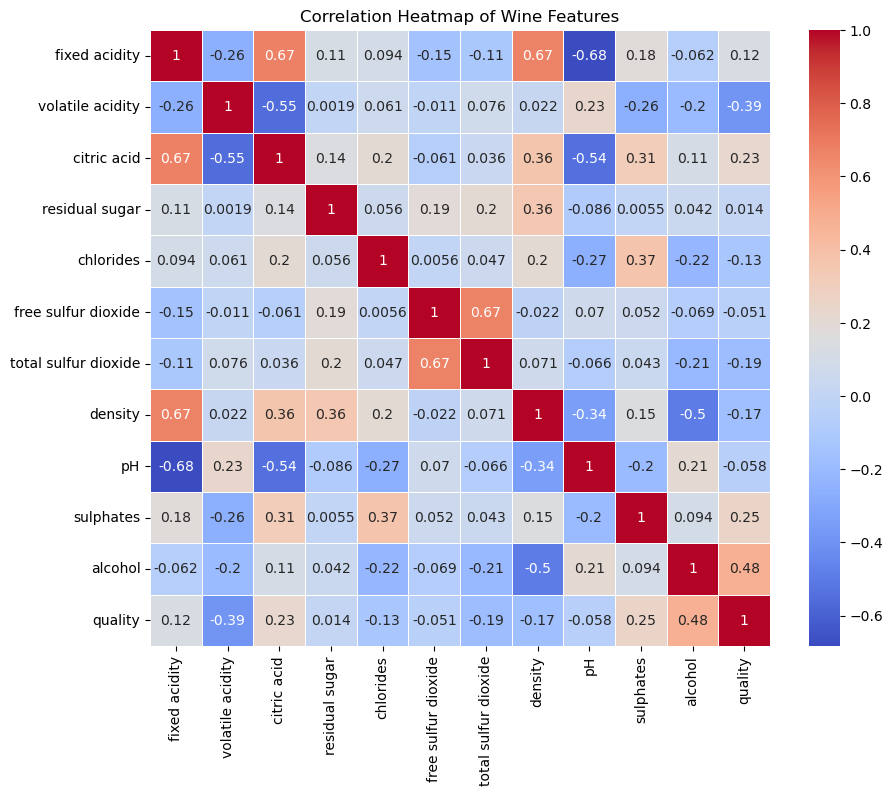

In [8]:
plt.figure(figsize=(10, 8))
corr_matrix = wine_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

## Line Plot with Confidence Intervals for Sulfates
- Objective: Observe trends in the average sulfates across wine quality classes with 95% confidence intervals.
- Exercise: Create a line plot showing the mean sulfate content for each quality class, with error bars indicating 95% confidence intervals.

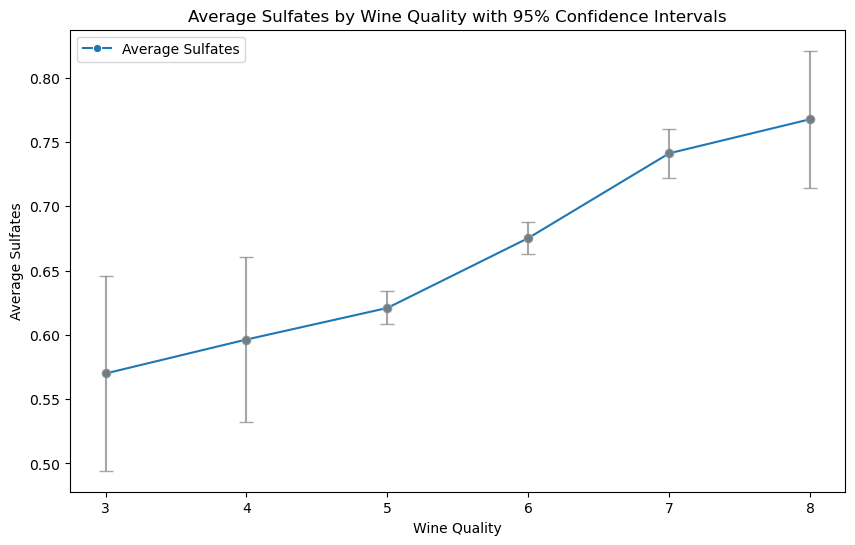

In [9]:
summary_stats = wine_data.groupby('quality').agg(
    mean_sulfates=pd.NamedAgg(column='sulphates', aggfunc='mean'),
    std_sulfates=pd.NamedAgg(column='sulphates', aggfunc='std'),
    n=pd.NamedAgg(column='sulphates', aggfunc='count')
).reset_index()
summary_stats['ci95'] = 1.96 * (summary_stats['std_sulfates'] / np.sqrt(summary_stats['n']))

plt.figure(figsize=(10, 6))
sns.lineplot(x='quality', y='mean_sulfates', data=summary_stats, marker='o', label='Average Sulfates')
plt.errorbar(summary_stats['quality'], summary_stats['mean_sulfates'], yerr=summary_stats['ci95'], fmt='o', capsize=5, color='gray', alpha=0.7)
plt.title('Average Sulfates by Wine Quality with 95% Confidence Intervals')
plt.xlabel('Wine Quality')
plt.ylabel('Average Sulfates')
plt.show()